### Classification using the MNIST dataset

In [34]:
import os
# Where to save the figures
PROJECT_ROOT_DIR = "."

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
from sklearn.datasets.mldata import fetch_mldata

In [3]:
dataset = fetch_mldata('mnist-original')

In [6]:
dataset.data.shape

(70000, 784)

In [8]:
X, y = dataset["data"], dataset["target"]

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
%matplotlib inline

In [13]:
import matplotlib
import matplotlib.pyplot as plt

In [57]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

('Saving figure', 'some_digit_plot')


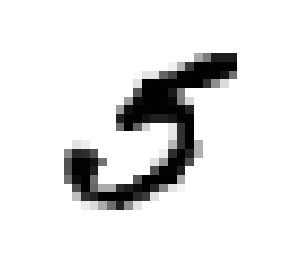

In [58]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
save_fig("some_digit_plot")
plt.show()

In [59]:
y[36000]

5.0

Let's select and set aside a test set

In [60]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Now we test a binary classifier, employing the Stochastic Gradient Descent (SGD) approach

In [66]:
import numpy as np

In [67]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [68]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [69]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [70]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)